In [1]:
import sys
print(sys.executable)


d:\ML_PROJECT\time_series_analysis\venv\Scripts\python.exe


In [3]:
#libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("dark_background")
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime


In [4]:
#available stock names list
url= "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table =pd.read_html(url)[0] # reads the first table
codes =table["Symbol"].tolist()
names=table["Security"].tolist()
list(zip(codes[:100],names[:100]))

[('MMM', '3M'),
 ('AOS', 'A. O. Smith'),
 ('ABT', 'Abbott Laboratories'),
 ('ABBV', 'AbbVie'),
 ('ACN', 'Accenture'),
 ('ADBE', 'Adobe Inc.'),
 ('AMD', 'Advanced Micro Devices'),
 ('AES', 'AES Corporation'),
 ('AFL', 'Aflac'),
 ('A', 'Agilent Technologies'),
 ('APD', 'Air Products'),
 ('ABNB', 'Airbnb'),
 ('AKAM', 'Akamai Technologies'),
 ('ALB', 'Albemarle Corporation'),
 ('ARE', 'Alexandria Real Estate Equities'),
 ('ALGN', 'Align Technology'),
 ('ALLE', 'Allegion'),
 ('LNT', 'Alliant Energy'),
 ('ALL', 'Allstate'),
 ('GOOGL', 'Alphabet Inc. (Class A)'),
 ('GOOG', 'Alphabet Inc. (Class C)'),
 ('MO', 'Altria'),
 ('AMZN', 'Amazon'),
 ('AMCR', 'Amcor'),
 ('AEE', 'Ameren'),
 ('AEP', 'American Electric Power'),
 ('AXP', 'American Express'),
 ('AIG', 'American International Group'),
 ('AMT', 'American Tower'),
 ('AWK', 'American Water Works'),
 ('AMP', 'Ameriprise Financial'),
 ('AME', 'Ametek'),
 ('AMGN', 'Amgen'),
 ('APH', 'Amphenol'),
 ('ADI', 'Analog Devices'),
 ('ANSS', 'Ansys'),
 ('A

In [ ]:
# the companies we r gonna be analysing
tech_list=['AMZN','GOOG','ACN','MMM']

end= datetime.now()
start=datetime(end.year-1,end.month,end.day)

# storing all the stock data in a dictionary   
stock_data={}
for stock in tech_list:
    stock_data[stock]=yf.download(stock,start,end)

company_list=list(stock_data.values())
company_name =["AMAZON","GOOGLE","ACCENTURE","3M"]

for stock in tech_list:
    stock_data[stock].columns = stock_data[stock].columns.droplevel(1)  # Drops the first level 

for stock, df in stock_data.items():
    print(f"Stock: {stock}")
    print(df.head(), "\n")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock: AMZN
Price            Close        High         Low        Open    Volume
Date                                                                
2024-02-14  170.979996  171.210007  168.279999  169.210007  42815500
2024-02-15  169.800003  171.169998  167.589996  170.580002  49855200
2024-02-16  169.509995  170.419998  167.169998  168.740005  48074600
2024-02-20  167.080002  168.710007  165.740005  167.830002  41980300
2024-02-21  168.589996  170.229996  167.139999  168.940002  44575600 

Stock: GOOG
Price            Close        High         Low        Open    Volume
Date                                                                
2024-02-14  146.613220  147.300752  145.033888  146.842393  16651800
2024-02-15  143.424667  144.241724  141.372045  143.942810  26724300
2024-02-16  141.252457  143.962720  141.013326  143.693697  21849700
2024-02-20  141.690872  142.815828  140.295891  140.435389  18625600
2024-02-21  143.325012  143.464510  141.401929  142.129312  16499600 

Stock:

In [28]:
# looping through each dataframe and adding respective company names
for stock_df, name in zip(company_list, company_name):
    stock_df["Company"] = name

# Merge all into one DataFrame
df = pd.concat(company_list, axis=0)
df.reset_index(inplace=True) 
df.head(10)

Price,Date,Close,High,Low,Open,Volume,Company
0,2024-02-14,170.979996,171.210007,168.279999,169.210007,42815500,AMAZON
1,2024-02-15,169.800003,171.169998,167.589996,170.580002,49855200,AMAZON
2,2024-02-16,169.509995,170.419998,167.169998,168.740005,48074600,AMAZON
3,2024-02-20,167.080002,168.710007,165.740005,167.830002,41980300,AMAZON
4,2024-02-21,168.589996,170.229996,167.139999,168.940002,44575600,AMAZON
5,2024-02-22,174.580002,174.800003,171.770004,173.100006,55392400,AMAZON
6,2024-02-23,174.990005,175.750000,173.699997,174.279999,59715200,AMAZON
7,2024-02-26,174.729996,176.369995,174.259995,175.699997,44368600,AMAZON
8,2024-02-27,173.539993,174.619995,172.860001,174.080002,31141700,AMAZON
9,2024-02-28,173.160004,174.050003,172.270004,172.440002,28180500,AMAZON


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1004 non-null   datetime64[ns]
 1   Close    1004 non-null   float64       
 2   High     1004 non-null   float64       
 3   Low      1004 non-null   float64       
 4   Open     1004 non-null   float64       
 5   Volume   1004 non-null   int64         
 6   Company  1004 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 55.0+ KB


In [30]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
count,1004,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,2024-08-13 21:02:09.083665408,204.461846,206.437447,202.434883,204.412312,1.644109e+07
min,2024-02-14 00:00:00,74.685471,75.348125,74.332219,74.841569,8.032000e+05
25%,2024-05-14 00:00:00,143.723576,144.234246,141.394458,143.880532,3.002125e+06
50%,2024-08-14 00:00:00,179.764511,181.972087,178.254997,180.100006,1.139230e+07
75%,2024-11-12 00:00:00,251.393127,252.638000,247.609567,249.026358,2.738385e+07
max,2025-02-13 00:00:00,398.250000,398.350006,390.420013,395.200012,1.414484e+08
std,NaN,85.703721,86.483159,85.004143,85.751385,1.723343e+07


In [33]:
df.isnull().sum()

Price
Date       0
Close      0
High       0
Low        0
Open       0
Volume     0
Company    0
dtype: int64

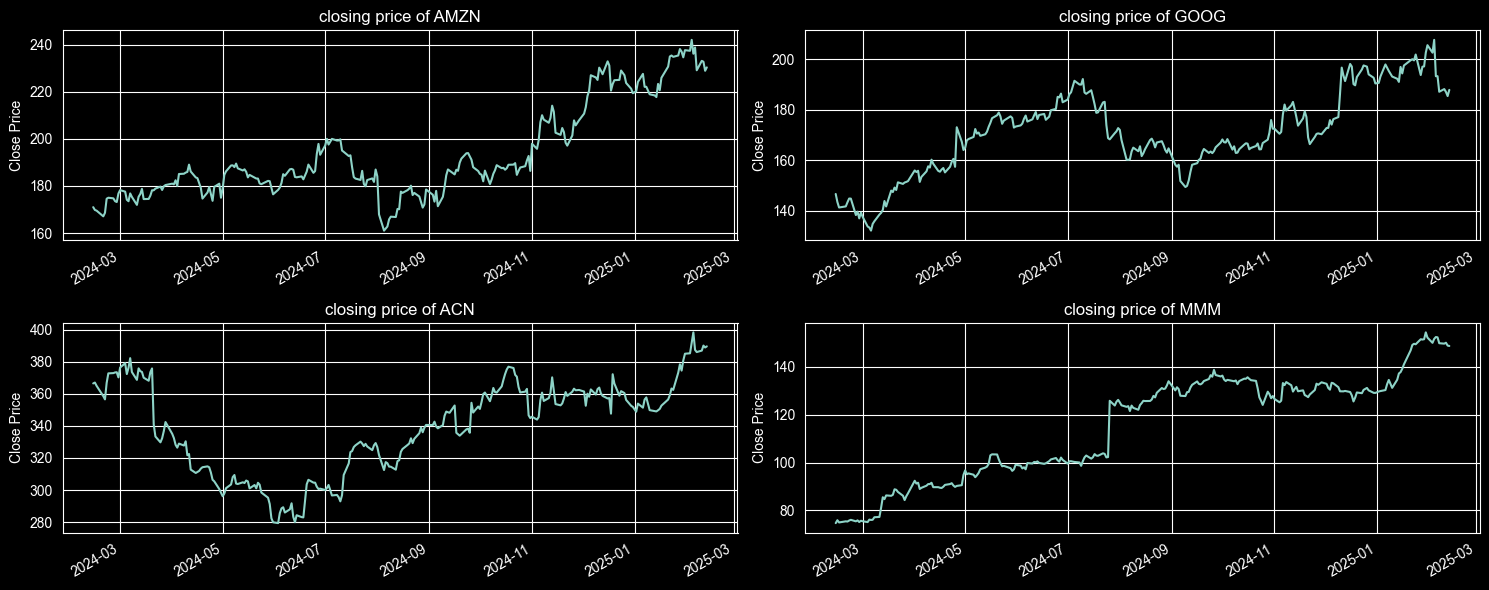

In [35]:
#lets plot visualizations on closing prices
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Close'].plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"closing price of {tech_list[i-1]}")
plt.tight_layout()
plt.show()


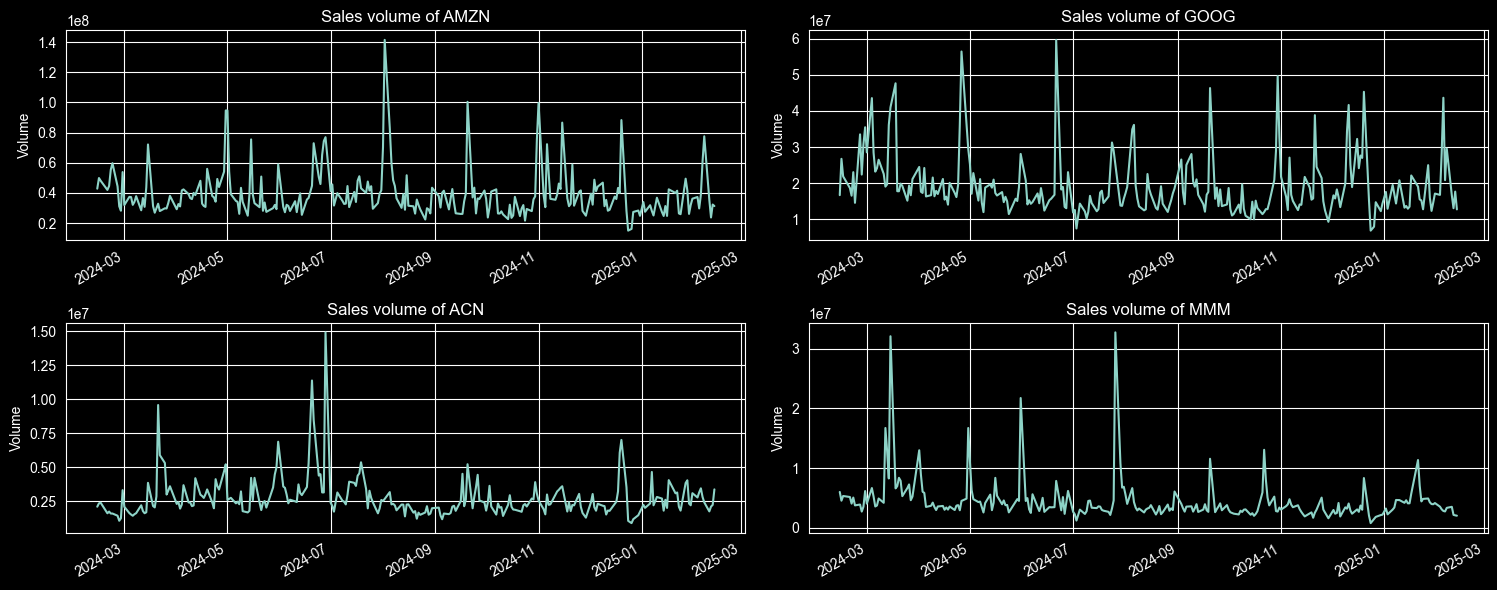

In [36]:
#visualizations on volume of sales
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales volume of {tech_list[i-1]}")
plt.tight_layout()
plt.show()